1. [차원변환] 첨부된 데이터를 이용하여 아래의 과업을 수행하고 결과들을 확인하세요.(Hint: scikit-learn 사용)

(1) [PCA] 2차원 변환하는 주성분 분석을 수행한 결과를 확인하고, 시각화하세요(7점) 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline


features=["feature1", "feature2", "feature3", "feature4"]

# load dataset into pandas DataFrame
url = "data/assignmet5_data.csv"

df = pd.read_csv(url, names=features)

df.head()

,feature1,feature2,feature3,feature4
0,feature 1,feature 2,feature 3,feature 4
1,5.1,3.5,1.4,0.2
2,4.9,3,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2


In [2]:
# Separating out the features
x = df.loc[1:, features].values

# test proportion of the features
print(x[0:2])

# Standardizing the features, N(0, 1)
x = StandardScaler().fit_transform(x)

standardDf = pd.DataFrame(data=x, columns = features)

standardDf.head()

[['5.1' '3.5' '1.4' '0.2']
 ['4.9' '3' '1.4' '0.2']]


/home/hyunyoung2/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,feature1,feature2,feature3,feature4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [3]:
pcaComponent=["principal component 1", "principal compoent 2"]

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x) 

# checking variance
print("varince : {}".format(pca.explained_variance_ratio_))

pricivpalDf = pd.DataFrame(data = principalComponents, columns = pcaComponent)


pricivpalDf.head()

varince : [0.72770452 0.23030523]


,principal component 1,principal compoent 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


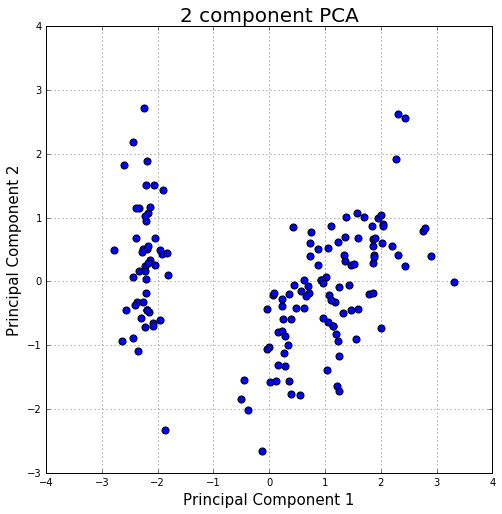

In [4]:
# visualize 2D Projection 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize=15)
ax.set_ylabel("Principal Component 2", fontsize=15)
ax.set_title("2 component PCA", fontsize=20)

ax.scatter(pricivpalDf.loc[:, pcaComponent[0]], 
           pricivpalDf.loc[:, pcaComponent[1]], 
           c ="b", 
           s=50)

ax.grid()

(2) [t-SNE] 2차원 변환하는 t-SNE 수행한 결과를 확인하고, 시각화하세요.(7점)

In [5]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(x)

print("t-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

tsneComponent=["x", "y"]

tsneDf = pd.DataFrame(data = tsne_results, columns = tsneComponent)

tsneDf.head()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.868185
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.752071
[t-SNE] Error after 300 iterations: 0.130219
t-SNE done! Time elapsed: 0.6002943515777588 seconds


,x,y
0,-9.636526,8.384428
1,-7.725962,8.092324
2,-8.282676,8.690121
3,-7.805793,8.870246
4,-10.013817,8.682937


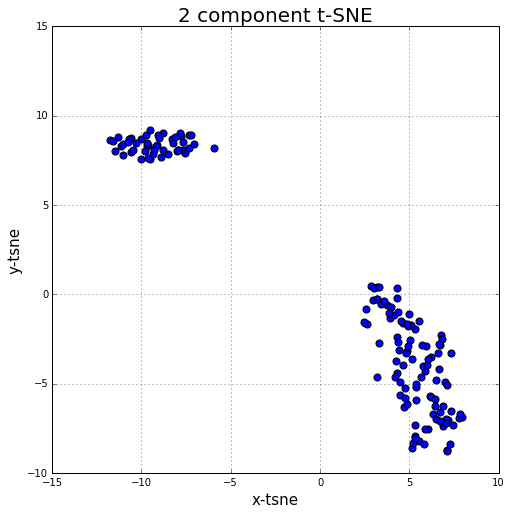

In [6]:
# visualize 2D Projection 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("x-tsne", fontsize=15)
ax.set_ylabel("y-tsne", fontsize=15)
ax.set_title("2 component t-SNE", fontsize=20)

ax.scatter(tsneDf.loc[:, tsneComponent[0]], 
           tsneDf.loc[:, tsneComponent[1]], 
           c ="b", 
           s=50)

ax.grid()

2. [군집화] 첨부된 데이터를 이용하여 아래의 과업을 수행하고 결롸들을 확인하세요.(Hint: scikit-learn 사용)

In [7]:
features=["feature1", "feature2", "feature3", "feature4"]

# load dataset into pandas DataFrame
url = "data/assignmet5_data.csv"

df = pd.read_csv(url, names=features)

df.head()

,feature1,feature2,feature3,feature4
0,feature 1,feature 2,feature 3,feature 4
1,5.1,3.5,1.4,0.2
2,4.9,3,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2


In [8]:
# Separating out the features
x = df.loc[1:, features].values

# test proportion of the features
print(x[0:2])

# Standardizing the features, N(0, 1)
x = StandardScaler().fit_transform(x)

standardDf = pd.DataFrame(data=x, columns = features)

standardDf.head()

[['5.1' '3.5' '1.4' '0.2']
 ['4.9' '3' '1.4' '0.2']]


/home/hyunyoung2/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,feature1,feature2,feature3,feature4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


(1) [K-means] K-평균 군집화(K=4)를 수행한 결과를 확인하세요.(7점)

In [9]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
# fit Kmeans object to data
kmeans = KMeans(n_clusters=4).fit(x)
# print location of clusters learned by kmeans object
print("kmeans cluster centers:")
print(kmeans.cluster_centers_)
print("kmeans labels")
print(kmeans.labels_)

standardDf = pd.DataFrame(data=x, columns = features)

standardDf.head()

kmeans cluster centers:
[[-1.28213558  0.22643209 -1.30968035 -1.29836862]
 [-0.01139555 -0.87288504  0.37688422  0.31165355]
 [ 1.16743407  0.15377779  1.00314548  1.02963256]
 [-0.70049078  1.56529014 -1.29924123 -1.20436862]]
kmeans labels
[3 0 0 0 3 3 0 0 0 0 3 0 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 3 0 0 0 3 3 3 0 0 3
 0 0 0 3 0 0 3 3 0 3 0 3 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


,feature1,feature2,feature3,feature4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [10]:
kmeanslabelDf = pd.DataFrame(data=kmeans.labels_, columns = ["label"])

kmeanslabelDf.head()

,label
0,3
1,0
2,0
3,0
4,3


In [11]:
kmeansFinalDf = pd.concat([standardDf, kmeanslabelDf], axis = 1)

kmeansFinalDf.head()

,feature1,feature2,feature3,feature4,label
0,-0.900681,1.032057,-1.341272,-1.312977,3
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,3


(2) [K-medoid] K-중심 군집화(K=4)를 수행한 결과를 확인하세요.(7점)

In [12]:
from pyclustering.cluster.kmedoids import kmedoids
import random
# load list of points for cluster analysis
sample = x

# set random initial medoids
init_int = list(range(0,150))
init_medoids = random.sample(init_int, 4)
print("init_medoids: {}".format(init_medoids))

# create instance of K-Medoids algorithm
kmedoids_instance = kmedoids(sample, init_medoids)

# run cluster analysis and obtain results
kmedoids_instance.process();
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
# show allocated clusters
print("medodis: {}".format(medoids))
print(clusters[0][0:5])

init_medoids: [96, 131, 70, 71]
medodis: [7, 105, 147, 94]
[7, 0, 1, 2, 3]


In [13]:
labels_idx = []

for idx in range(0, 150):
    if idx in clusters[0]:
        labels_idx.append(0)
    elif idx in clusters[1]:
        labels_idx.append(1)
    elif idx in clusters[2]:
        labels_idx.append(2)
    elif idx in clusters[3]:
        labels_idx.append(3)
        
print("labels_idx: {}, len-{}".format(labels_idx[0:5], len(labels_idx)))

kmeanslabelDf = pd.DataFrame(data=labels_idx, columns = ["label"])

kmeanslabelDf.head()

labels_idx: [0, 0, 0, 0, 0], len-150


,label
0,0
1,0
2,0
3,0
4,0


In [14]:
kmedoidsFinalDf = pd.concat([standardDf, kmeanslabelDf], axis = 1)

kmedoidsFinalDf.head()

,feature1,feature2,feature3,feature4,label
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


(3) [Affine propagation] 친밀도 전파 군집화를 수행한 결과를 확인하세.(7점)

In [15]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(preference=-50).fit(x)

cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

from sklearn import metrics

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x,
                                                                 labels, 
                                                         metric='sqeuclidean'))

standardDf = pd.DataFrame(data=x, columns = features)

standardDf.head()

Estimated number of clusters: 3
Silhouette Coefficient: 0.627


,feature1,feature2,feature3,feature4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [16]:
affinityPropagationlabelDf = pd.DataFrame(data=labels, columns = ["label"])
affinityPropagationlabelDf.head()

,label
0,0
1,0
2,0
3,0
4,0


In [17]:
affineFinalDf = pd.concat([standardDf, affinityPropagationlabelDf], axis = 1)

affineFinalDf.head()

,feature1,feature2,feature3,feature4,label
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


(4) 위의 3가지 군집결과를 비교하세요.(7점)

In [18]:

pcaComponent=["principal component 1", "principal compoent 2"]

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x) 

# checking variance
print("varince : {}".format(pca.explained_variance_ratio_))

pricivpalDf = pd.DataFrame(data = principalComponents, columns = pcaComponent)

pricivpalDf.head()

varince : [0.72770452 0.23030523]


,principal component 1,principal compoent 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


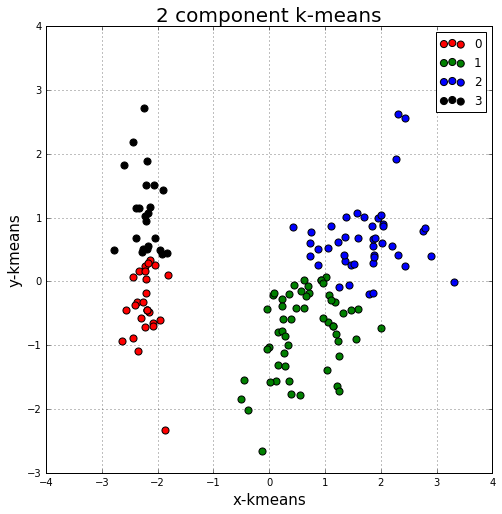

In [19]:
# k- means figure
targets = [0, 1, 2, 3]
colors =['r', 'g', 'b', 'black']
# visualize 2D Projection 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("x-kmeans", fontsize=15)
ax.set_ylabel("y-kmeans", fontsize=15)
ax.set_title("2 component k-means", fontsize=20)

for target, color in zip(targets, colors):
    indicesToKeep = kmeansFinalDf['label'] == target
    ax.scatter(pricivpalDf.loc[indicesToKeep, pcaComponent[0]], 
               pricivpalDf.loc[indicesToKeep, pcaComponent[1]], 
               c =color, 
               s=50)    

ax.legend(targets)
ax.grid()

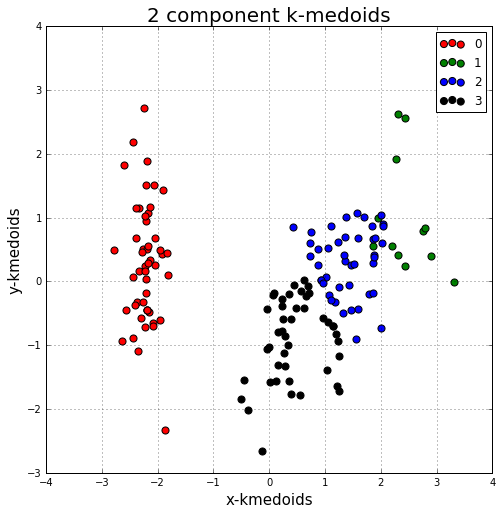

In [20]:
# k-medoids figure
targets = [0, 1, 2, 3]
colors =['r', 'g', 'b', 'black']
# visualize 2D Projection 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("x-kmedoids", fontsize=15)
ax.set_ylabel("y-kmedoids", fontsize=15)
ax.set_title("2 component k-medoids", fontsize=20)

for target, color in zip(targets, colors):
    indicesToKeep = kmedoidsFinalDf['label'] == target
    ax.scatter(pricivpalDf.loc[indicesToKeep, pcaComponent[0]], 
               pricivpalDf.loc[indicesToKeep, pcaComponent[1]], 
               c =color, 
               s=50)    

ax.legend(targets)
ax.grid()

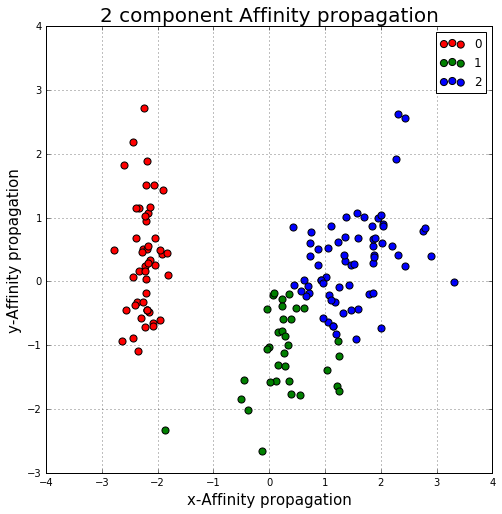

In [21]:
# Affinity propagtaion figure
targets = [0, 1, 2]
colors =['r', 'g', 'b']
# visualize 2D Projection 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("x-Affinity propagation", fontsize=15)
ax.set_ylabel("y-Affinity propagation", fontsize=15)
ax.set_title("2 component Affinity propagation", fontsize=20)

for target, color in zip(targets, colors):
    indicesToKeep = affineFinalDf['label'] == target
    ax.scatter(pricivpalDf.loc[indicesToKeep, pcaComponent[0]], 
               pricivpalDf.loc[indicesToKeep, pcaComponent[1]], 
               c =color, 
               s=50)    

ax.legend(targets)
ax.grid()

3. [순환신경망][예제 8-1]에서  y'^(2), y'^(3), y'^(4)를 구하는 과정을 보이세요. 또한,  X^(5) = (0.1, 0.1),  X^(6) = (0.1, 0.0)이 추가되어 샘플의 길이가 4에서 6이 되었다면  y'^(5), y'^(6) 을 구하세요.(14점)

In [22]:
import numpy as np

u = [[0.1, 0.1],
    [0.0, 0.0],
    [0.0, -0.1],]

w = [[0.1, 0.1, 0.0],
    [0.0, 0.0, 0.0],
    [0.2, -0.1, -0.1]]

v = [[0.0, 0.1, 0.0],
     [-0.2, 0.0, 0.0]]

b = [0.0, 0.0, 0.2]

c = [0.2, 0.1]

h0 = [0.0, 0.0, 0.0]

x1 = [0.0, 1.0]

H0 = np.array(h0)

X1 = np.array(x1)

U = np.array(u)

W = np.array(w)

V = np.array(v)

B = np.array(b)

C = np.array(c)

def a_(x, h):
    return np.dot(W, h) + np.dot(U, x) + B

def h_(a):
    return np.tanh(a)

def softmax(x):
    scoreMatEx = np.exp(x)
    return scoreMatEx / scoreMatEx.sum(0)

def y_(h):
    return softmax(np.dot(V, h) + C)

def rnn(x, h):
    hidden = h_(a_(x , h))
    return y_(hidden), hidden

x2 = [0.0, 0.1]

x3 = [0.1, -0.2]

x4 = [0.5, 0.0]

x5 = [0.1, 0.1]

x6 = [0.1, 0.0]

X2 = np.array(x2)

X3 = np.array(x3)

X4 = np.array(x4)

X5 = np.array(x5)

X6 = np.array(x6)

Y1, H1 = rnn(X1, H0)

print("y1: {}".format(Y1))

Y2, H2 = rnn(X2, H1)

print("y2: {}".format(Y2))

Y3, H3 = rnn(X3, H2)

print("y3: {}".format(Y3))

Y4, H4 = rnn(X4, H3)

print("y4: {}".format(Y4))

Y5, H5 = rnn(X5, H4)

print("y5: {}".format(Y5))

Y6, H6 = rnn(X6, H5)

print("y6: {}".format(Y6))


y1: [0.52994751 0.47005249]
y2: [0.5259748 0.4740252]
y3: [0.52458 0.47542]
y4: [0.52743043 0.47256957]
y5: [0.52622146 0.47377854]
y6: [0.52560211 0.47439789]


4. [순환신경망] $ y^{(t)} = (0, 1)^{T} $일 때 식 (8.16)을 유도하세요. 또한 식 (8.19)는 식 (8.16)을 일반화한 것인데 일반화 과정을 설명하세요.(14점)

# Reference

 - [PCA using python on Towards Data Science](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
 
 - [Visualising high-dimensional datasets using PCA and T-SNE in python](https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)
 
 - [K-Means Clusterring with Scikit-learn](https://stackabuse.com/k-means-clustering-with-scikit-learn/)
 
 - [clustering_with scikit with GIFs](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)
 
 - [scikit-learn plot affinity propagtion](https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html)
 
 - [pyclustering github for k-medoids](https://github.com/annoviko/pyclustering)
 
 - [pyclustering documentation](https://codedocs.xyz/annoviko/pyclustering/)